# Statistiques et visualisations

## Statistiques

In [1]:
import pandas as pd


In [3]:
corpus = pd.read_excel("./image_science_france_2011_simplifie.xls")

In [4]:
corpus.columns

Index(['Unnamed: 0', 'sexe', 'age', 'pcs', 'diplome', 'politique', 'revenus',
       'confiance_ind', 'interetpolitique', 'interetscience', 'apportscience',
       'connaissance_sci'],
      dtype='object')

In [5]:
corpus.shape

(1027, 12)

### Première étape : distributions et tri à plat

In [10]:
corpus["sexe"].value_counts()

Femme    534
Homme    493
Name: sexe, dtype: int64

In [11]:
corpus["sexe"].value_counts(normalize=True)

Femme    0.519961
Homme    0.480039
Name: sexe, dtype: float64

In [18]:
tri_a_plat = corpus["apportscience"].value_counts(normalize=True).apply(lambda x : 100*round(x,3))

In [19]:
tri_a_plat

A peu près autant de bien que de mal    52.9
Plus de bien que de mal                 40.6
Plus de mal que de bien                  6.5
Name: apportscience, dtype: float64

Sauvegarder

In [20]:
tri_a_plat.to_excel("resultat.xls")

Statistiques descriptives sur des variables quantitatives

In [22]:
corpus["age"].describe()

count    1027.000000
mean       48.140214
std        17.954073
min        18.000000
25%        33.000000
50%        46.000000
75%        62.000000
max        88.000000
Name: age, dtype: float64

### On veut faire de l'analyse bivariée

#### Un tableau croisé

En valeurs absolues

In [23]:
pd.crosstab(corpus["sexe"],corpus["apportscience"])

apportscience,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien
sexe,,,
Femme,299,190,35
Homme,237,221,31


Par pourcentage par ligne

In [25]:
pd.crosstab(corpus["sexe"],corpus["apportscience"],normalize="index",margins=True)

apportscience,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien
sexe,,,
Femme,0.570611,0.362595,0.066794
Homme,0.484663,0.451943,0.063395
All,0.529121,0.405726,0.065153


Si on a une variable qualitative et une variable quantitative

In [26]:
corpus.groupby("sexe")["confiance_ind"].mean()

sexe
Femme    0.547753
Homme    0.549493
Name: confiance_ind, dtype: float64

Avantage de Pandas : manipulation de tableau

In [27]:
t1 = pd.crosstab(corpus["sexe"],corpus["apportscience"],normalize="index",margins=True)

In [32]:
t1

apportscience,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien
sexe,,,
Femme,0.570611,0.362595,0.066794
Homme,0.484663,0.451943,0.063395
All,0.529121,0.405726,0.065153


In [30]:
t2 = pd.crosstab(corpus["diplome"],corpus["apportscience"],normalize="index",margins=True)

In [31]:
t2

apportscience,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien
diplome,,,
Intermédiaire,0.605882,0.302941,0.091176
Primaire,0.617647,0.323529,0.058824
Secondaire,0.527473,0.417582,0.054945
Supérieur,0.423469,0.525510,0.051020
Supérieur médical,0.500000,0.458333,0.041667
Supérieur scientifique,0.329897,0.628866,0.041237
All,0.529237,0.405352,0.065411


In [38]:
# Créer des tableaux
t1 = pd.crosstab(corpus["sexe"],corpus["apportscience"],normalize="index",margins=True)
t2 = pd.crosstab(corpus["diplome"],corpus["apportscience"],normalize="index",margins=True)
# Les concaténer
tab_complet = pd.concat({"Genre":t1,"Diplome":t2})
# Ecrire dans un fichier
tab_complet.to_excel("tableau.xls")

tab_complet

apportscience                   A peu près autant de bien que de mal  \
Genre   Femme                                               0.570611   
        Homme                                               0.484663   
        All                                                 0.529121   
Diplome Intermédiaire                                       0.605882   
        Primaire                                            0.617647   
        Secondaire                                          0.527473   
        Supérieur                                           0.423469   
        Supérieur médical                                   0.500000   
        Supérieur scientifique                              0.329897   
        All                                                 0.529237   

apportscience                   Plus de bien que de mal  \
Genre   Femme                                  0.362595   
        Homme                                  0.451943   
        All                                    0.405726   
Diplome Intermédiaire                          0.302941   
        Primaire                               0.323529   
        Secondaire                             0.417582   
        Supérieur                              0.525510   
        Supérieur médical                      0.458333   
        Supérieur scientifique                 0.628866   
        All                                    0.405352   

apportscience                   Plus de mal que de bien  
Genre   Femme                                  0.066794  
        Homme                                  0.063395  
        All                                    0.065153  
Diplome Intermédiaire                          0.091176  
        Primaire                               0.058824  
        Secondaire                             0.054945  
        Supérieur                              0.051020  
        Supérieur médical                      0.041667  
        Supérieur scientifique                 0.041237  
        All                                    0.065411

### On peut visualiser avec Pandas

Visualisation avec Pandas :
1. Mettre en forme le tableau
2. Utiliser la fonction plot

In [42]:
tab = corpus["sexe"].value_counts()
tab.plot(kind="bar")

<AxesSubplot:title={'center':'Genre des répondants'}>

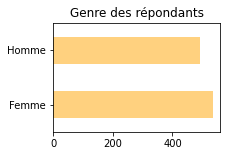

In [49]:
corpus["sexe"].value_counts().plot(kind="barh",figsize=(3,2),
                                   color="orange",alpha=0.5,title="Genre des répondants")

<AxesSubplot:title={'center':'Genre des répondants'}, ylabel='sexe'>

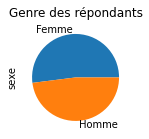

In [50]:
corpus["sexe"].value_counts().plot(kind="pie",figsize=(3,2),
                                   title="Genre des répondants")

<AxesSubplot:ylabel='Frequency'>

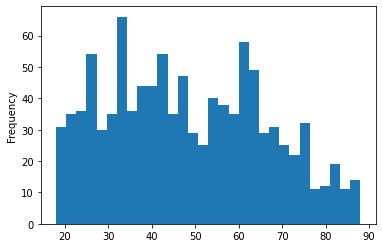

In [53]:
corpus["age"].plot(kind="hist",bins=30)

<AxesSubplot:xlabel='age', ylabel='confiance_ind'>

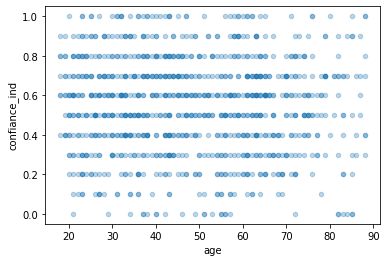

In [55]:
corpus.plot(kind="scatter",x="age",y="confiance_ind",alpha=0.3)

## Il existe beaucoup de bibliothèques de statistiques

Par exemple une bibliothèque maison

In [56]:
pip install pyshs

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pyshs

In [58]:
pyshs.tri_a_plat(corpus,"diplome")

,Effectif,Pourcentage (%)
Intermédiaire,347.0,33.9
Primaire,172.0,16.8
Secondaire,184.0,18.0
Supérieur,198.0,19.4
Supérieur médical,25.0,2.4
Supérieur scientifique,97.0,9.5
Total,1023.0,100.0


In [59]:
pyshs.tableau_croise(corpus,"sexe","apportscience")

,A peu près autant de bien que de mal,Plus de bien que de mal,Plus de mal que de bien,Total
Femme,299 (57.1%),190 (36.3%),35 (6.7%),524 (100%)
Homme,237 (48.5%),221 (45.2%),31 (6.3%),489 (100%)
Total,536 (52.9%),411 (40.6%),66 (6.5%),1013 (100%)


Est-ce que le genre joue sur l'attitude positive à la science quand on contrôle par le niveau de diplome : Régression logistique

In [65]:
# Créer une variable dépendante valant 1 sur la modalité d'intérêt et 0 sinon
corpus["apport_positif"] = corpus["apportscience"].apply(lambda x : 1 if x == "Plus de bien que de mal" else 0)

# Création d'un modèle
pyshs.regression_logistique(corpus,"apport_positif",["sexe","diplome","age"])

Odds Ratio       p            IC 95%
Variable   Modalité                                                   
.Intercept                              0.14  0.0***  0.14 [0.09-0.23]
age        numérique                    1.02  0.0***  1.02 [1.01-1.03]
diplome    Intermédiaire                 ref                          
           Primaire                     0.87   0.526  0.87 [0.57-1.33]
           Secondaire                   1.98  0.0***  1.98 [1.35-2.91]
           Supérieur                    2.94  0.0***  2.94 [2.03-4.27]
           Supérieur médical            2.32   0.051  2.32 [1.00-5.39]
           Supérieur scientifique       3.99  0.0***  3.99 [2.47-6.46]
sexe       Femme                         ref                          
           Homme                        1.41  0.011*  1.41 [1.08-1.85]